In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys,os
sys.path.append(os.path.abspath(os.path.join("..")))
from config import *
import umap 

/mnt/c/Users/Lenovo/Documents/project/capstone_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
df = pd.read_csv(vcf_path+"/GeneVariantsCounts.csv")
df.drop(columns=['patient_id'],inplace=True)  

In [27]:
df

,PTPN22,LACC1,NOD2,TYK2,IL23R,label
0,2,1,1,0,0,0
1,2,1,0,1,0,1
2,2,1,0,0,0,1
3,2,2,0,0,1,0
4,2,0,0,0,0,0
...,...,...,...,...,...,...
106,2,0,0,0,0,0
107,2,0,0,0,1,1
108,1,1,0,0,0,0
109,2,2,0,0,0,1


In [4]:
df=df.sample(frac=1, random_state=42).reset_index(drop=True)

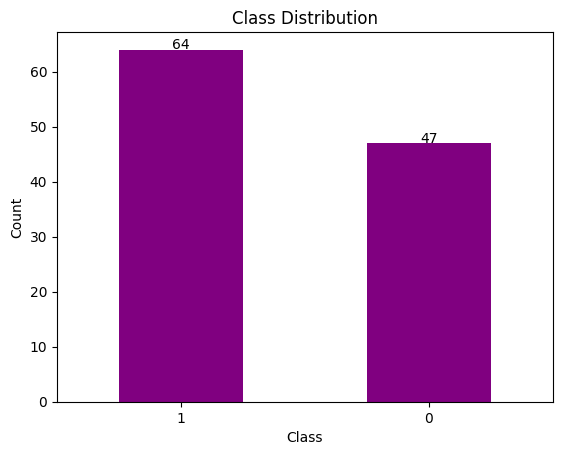

In [28]:
class_counts = df['label'].value_counts()
ax = class_counts.plot(kind='bar', color='purple', rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
for i, count in enumerate(class_counts):
    ax.text(i, count + 0.1, str(count), ha='center')
plt.show()

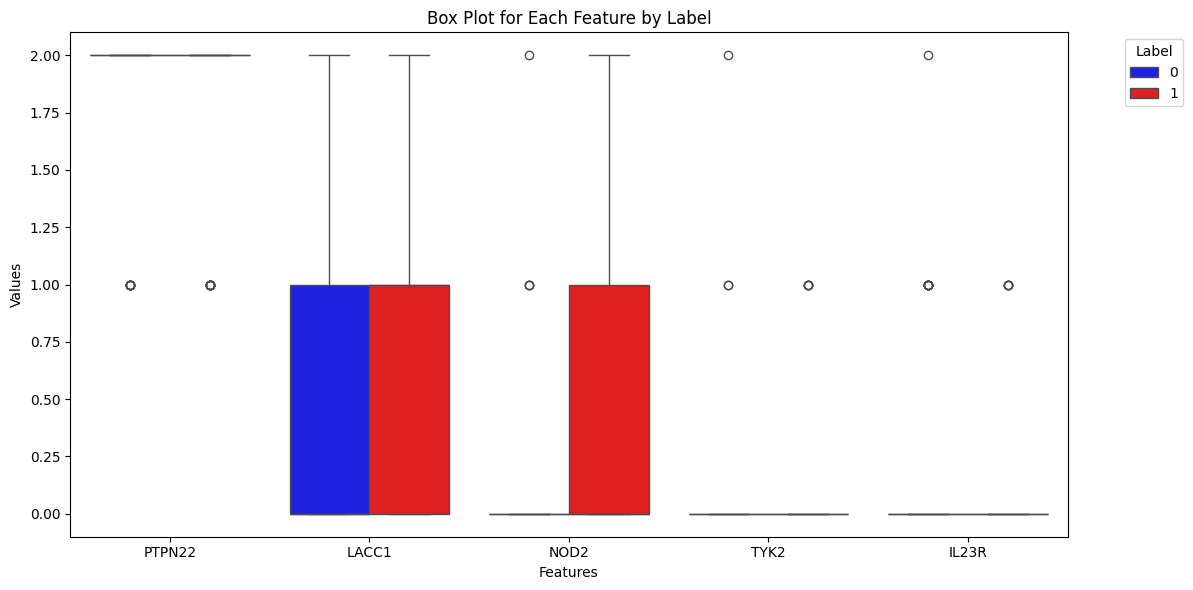

In [29]:
df_melted = df.melt(id_vars='label', var_name='Feature', value_name='Value')
palette = {0: 'blue', 1: 'red'}
plt.figure(figsize=(12, 6))  # Adjust figure size here
sns.boxplot(x='Feature', y='Value', hue='label', data=df_melted, palette=palette)
plt.title('Box Plot for Each Feature by Label')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

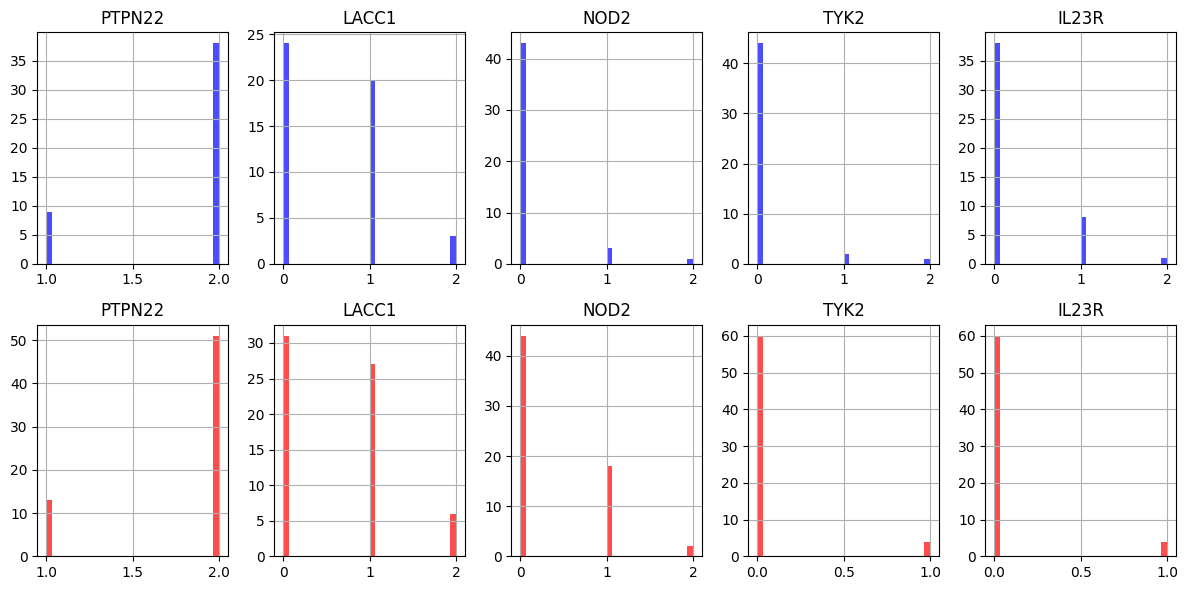

In [30]:
# Filter the DataFrame for label == 0 and label == 1
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
# Plot histogram for label 0
df_label_0.drop('label', axis=1).hist(bins=30, color='blue', alpha=0.7, ax=axes[0])
# Plot histogram for label 1
df_label_1.drop('label', axis=1).hist(bins=30, color='red', alpha=0.7, ax=axes[1])
# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
outliers = {}
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1 # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
print("Outliers detected:")
for feature, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"{feature}: {outlier_values.tolist()}")
    else:
        print(f"{feature}: No outliers")

Outliers detected:
PTPN22: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
LACC1: No outliers
NOD2: [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
TYK2: [1, 2, 1, 1, 1, 1, 1]
IL23R: [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
label: No outliers


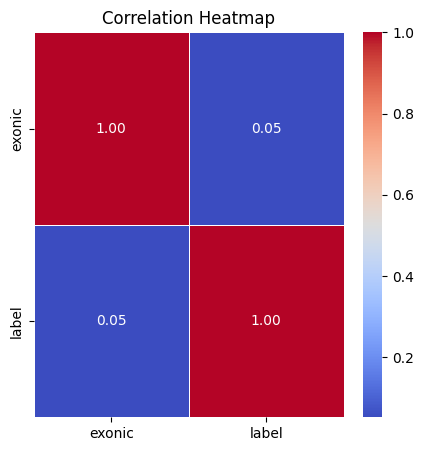

In [10]:
corr = df.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/mnt/c/Users/Lenovo/Documents/project/capstone_env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


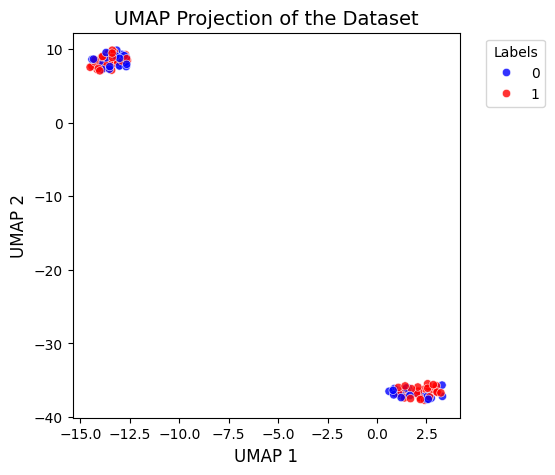

In [32]:
label = df['label']
reducer = umap.UMAP(metric='euclidean')
embedding = reducer.fit_transform(df.drop(columns=['label']))  # Drop the label column before fitting
plt.figure(figsize=(5, 5))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=label, palette=palette, alpha=0.8)
plt.title('UMAP Projection of the Dataset', fontsize=14)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


splitting

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['label'])  # Features (independent variables)
y = df['label']  # Target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (88, 5), Testing set size: (23, 5)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

logistic regression

Accuracy: 0.6522

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23



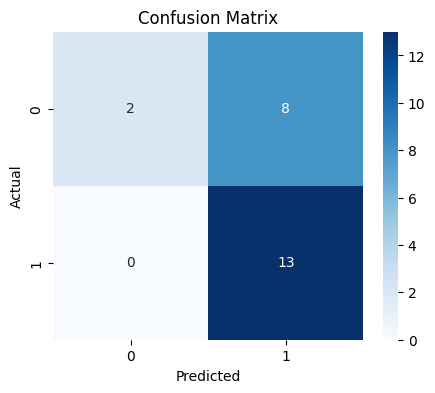

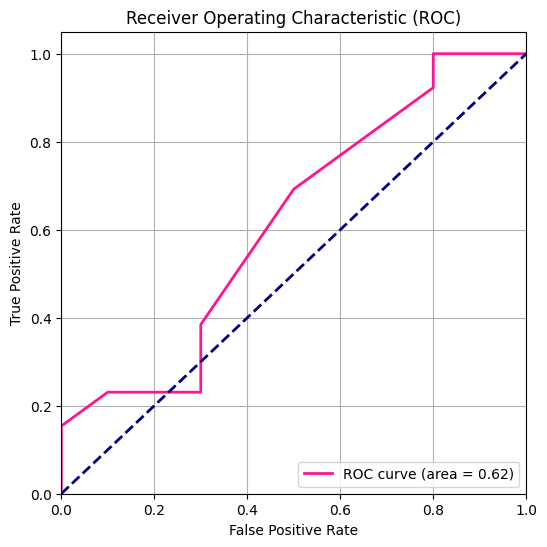

In [50]:
# Initialize and train logistic regression model
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
# Make predictions
y_pred = logistic.predict(X_test)
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=logistic.classes_, yticklabels=logistic.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC curve
y_probs = logistic.predict_proba(X_test)[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


svm

Accuracy: 0.6522

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.69      0.69      0.69        13

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23



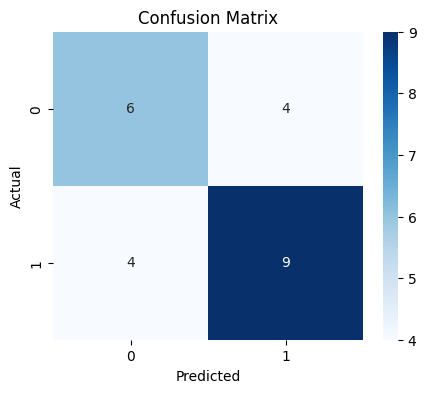

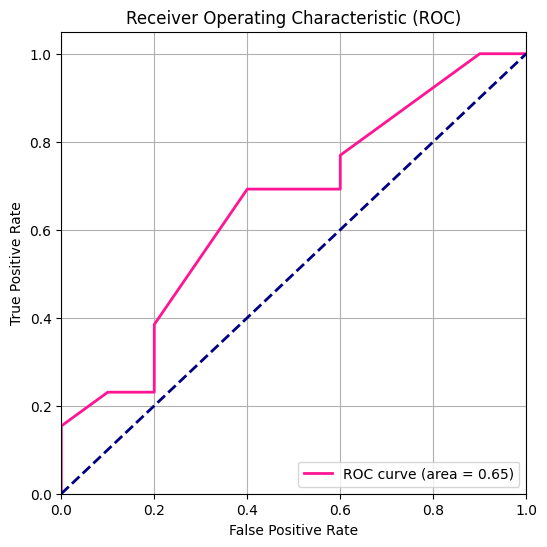

In [69]:
svm_model = SVC( kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


y_probs = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

randomForest

Accuracy: 0.6087

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.64      0.69      0.67        13

    accuracy                           0.61        23
   macro avg       0.60      0.60      0.60        23
weighted avg       0.60      0.61      0.61        23



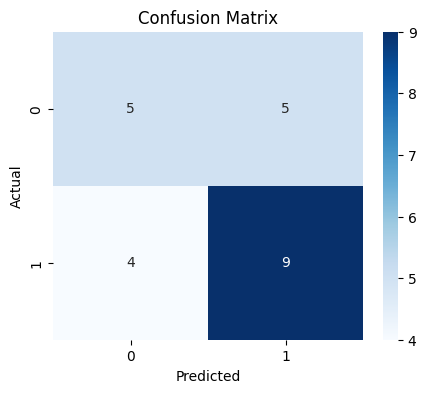

ROC AUC: 0.7000


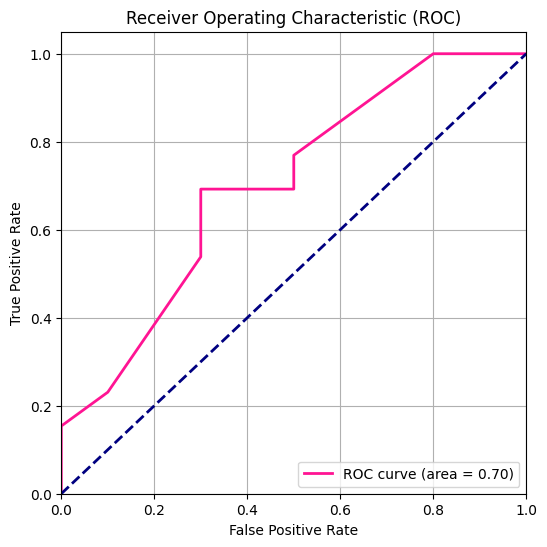

In [60]:
rf_model = RandomForestClassifier(
    max_depth=10, 
    max_features=None, 
    min_samples_leaf=4, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Plot ROC curve
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy: 0.6522

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23



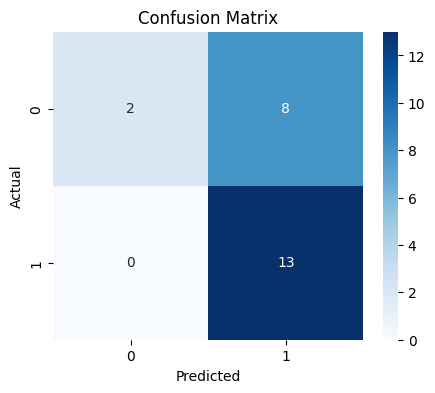

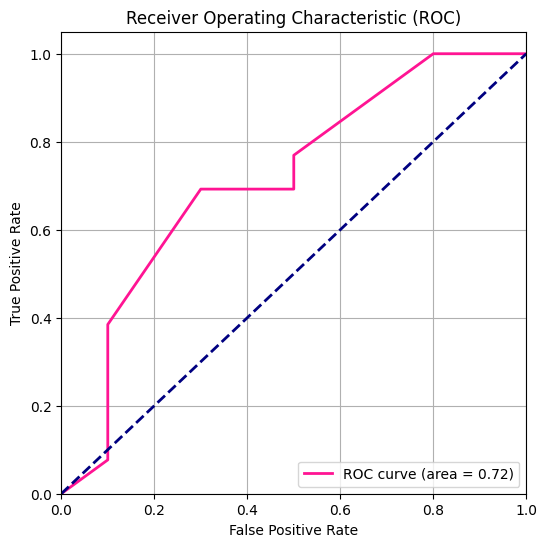

In [59]:
svm_model = SVC( kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
# Make predictions
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


y_probs = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
rf_model = grid_search.best_estimator_